##  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.


인사이트
1. 코로나로 고급품의 매출은 유지된 반면 생활용품 위주로 판매 급감

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pur_10000.csv to pur_10000 (2).csv


Task1. 일차 생성된 pur_10000.csv 데이터셋을 통계적 탐색 방법을 통하여 특성을 파악한 후 추가적인 인사이트를 적절하게 반영하세요.

통계적 분석 기법을 이용하여 첨부한 pur_10000.csv 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정하세요.
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정

In [ ]:
import pandas as pd
df = pd.read_csv('pur_10000.csv')
df.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,12249.265,59.5,7.288313e+05,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,29595.470,5.0,1.479774e+05,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,18873.070,67.0,1.264496e+06,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,16419.905,54.6,8.965268e+05,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,21871.485,68.6,1.500384e+06,2021-09-02,목,18,3,2021


In [ ]:
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cusno     10000 non-null  int64  
 1   gender    10000 non-null  int64  
 2   region    10000 non-null  int64  
 3   pur_id    10000 non-null  int64  
 4   product   10000 non-null  int64  
 5   price     10000 non-null  float64
 6   quantity  10000 non-null  float64
 7   amount    10000 non-null  float64
 8   date      10000 non-null  object 
 9   day       10000 non-null  object 
 10  time      10000 non-null  int64  
 11  age_cat   10000 non-null  int64  
 12  year      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.8+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 기술 통계량 계산
desc_stats = data[['price', 'quantity','amount', ]].describe()
desc_stats

,price,quantity,amount
count,10000.000000,10000.000000,1.000000e+04
mean,25476.613039,46.412770,1.215311e+06
std,16464.951720,27.494747,1.189877e+06
min,512.450000,0.700000,8.283555e+02
25%,12015.898750,22.500000,3.022346e+05
50%,22905.580000,45.900000,8.206026e+05
75%,37935.830000,68.400000,1.764778e+06
max,74999.685000,99.000000,7.245058e+06


In [ ]:
# 결측치 확인
data.isnull().sum().sum()

0

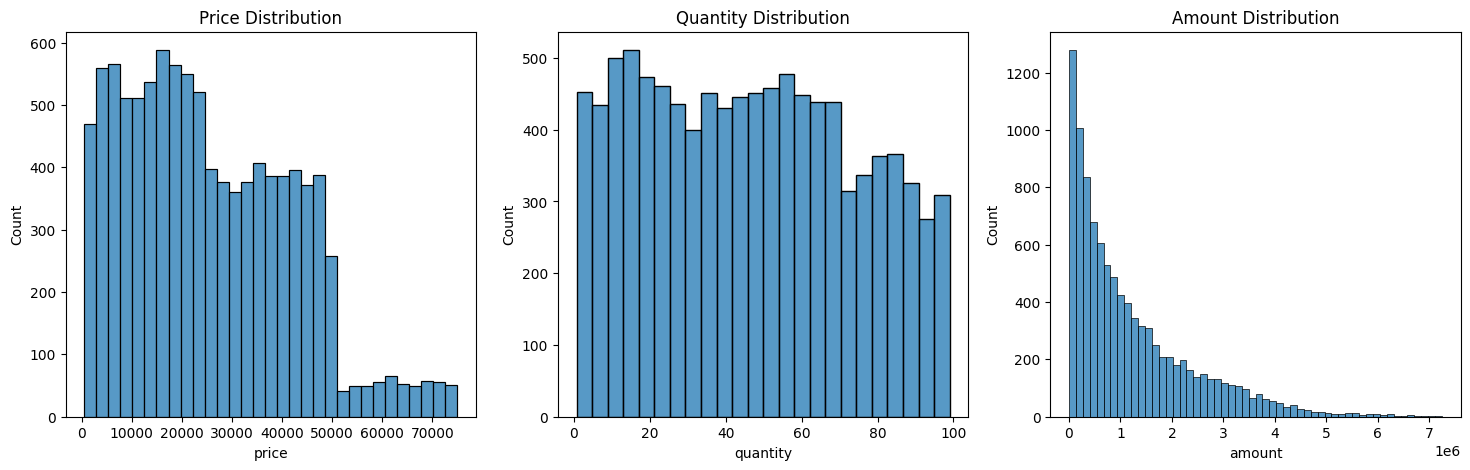

In [ ]:
# 가격, 구매 수량, 총 구매 금액 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

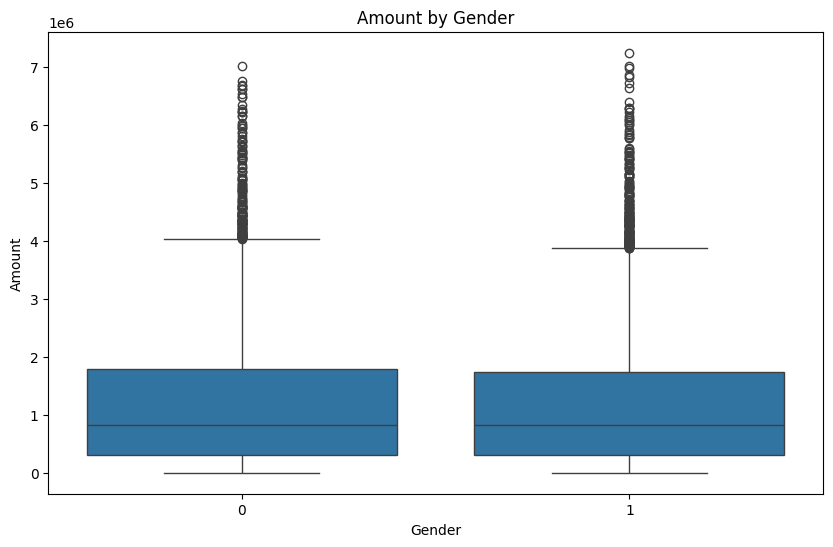

In [ ]:
# 성별에 따른 총 구매 금액의 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amount', data=data)
plt.title('Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
np.random.seed(42)

# 가격 분포를 정규분포로 변환
mu_price, sigma_price = norm.fit(data['price'].dropna())
data['price'] = np.random.normal(mu_price, sigma_price, data.shape[0])

# 구매 수량 분포를 정규분포로 변환
mu_quantity, sigma_quantity = norm.fit(data['quantity'].dropna())
data['quantity'] = np.random.normal(mu_quantity, sigma_quantity, data.shape[0])

# 총 구매 금액 업데이트 (가격 * 수량)
data['amount'] = data['price'] * data['quantity']

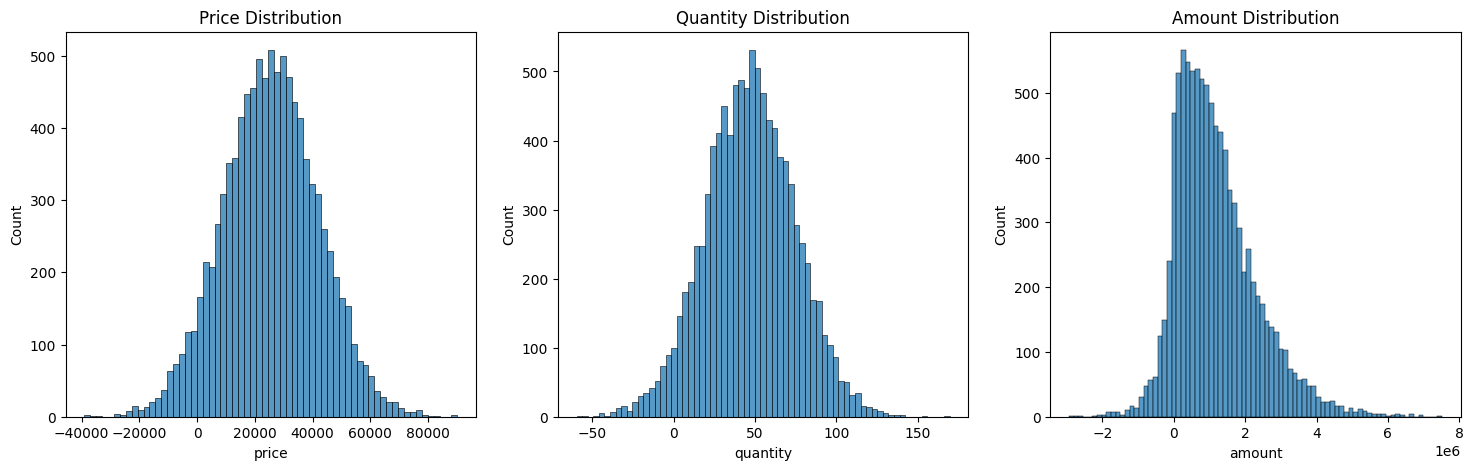

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

In [ ]:
# 가격, 구매 수량에 10개의 결측치 반영
data.loc[data.sample(10).index, 'price'] = np.nan
data.loc[data.sample(10).index, 'quantity'] = np.nan

In [ ]:
data.isnull().sum().sum()

20

In [ ]:
data.to_csv('pur_10000_modified.csv', index=False)

Task2. (예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행하세요.(거래기준 데이터 -> 고객기준 데이터로 변환)

In [ ]:
# 원본 데이터셋
df = pd.read_csv('pur_10000_modified.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cusno     10000 non-null  int64  
 1   gender    10000 non-null  int64  
 2   region    10000 non-null  int64  
 3   pur_id    10000 non-null  int64  
 4   product   10000 non-null  int64  
 5   price     9990 non-null   float64
 6   quantity  9990 non-null   float64
 7   amount    10000 non-null  float64
 8   date      10000 non-null  object 
 9   day       10000 non-null  object 
 10  time      10000 non-null  int64  
 11  age_cat   10000 non-null  int64  
 12  year      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.8+ KB


   cusno  gender  region  age_cat  20_amount_p10  20_amount_p20  \
0   1001       0       4        3   0.000000e+00   2.915543e+06   
1   1002       1       7        4   4.756338e+06   2.090488e+06   
2   1003       0      10        6   9.943409e+05   1.522321e+06   
3   1004       1       9        3   1.900657e+06   5.153127e+06   
4   1005       1       2        6   4.007756e+05   4.222592e+06   

   20_amount_p30  21_amount_p10  21_amount_p20  21_amount_p30  
0   1.887772e+06   1.250758e+07  -2.017787e+05   1.280688e+06  
1   1.371309e+06   5.852781e+06   1.424273e+06   1.486821e+05  
2   2.900658e+06   1.755748e+06   1.692743e+05   4.307277e+06  
3   1.022524e+06   9.260691e+05  -2.780676e+05   3.019324e+06  
4   3.460996e+03   9.650749e+05   4.698065e+05   5.788689e+05   



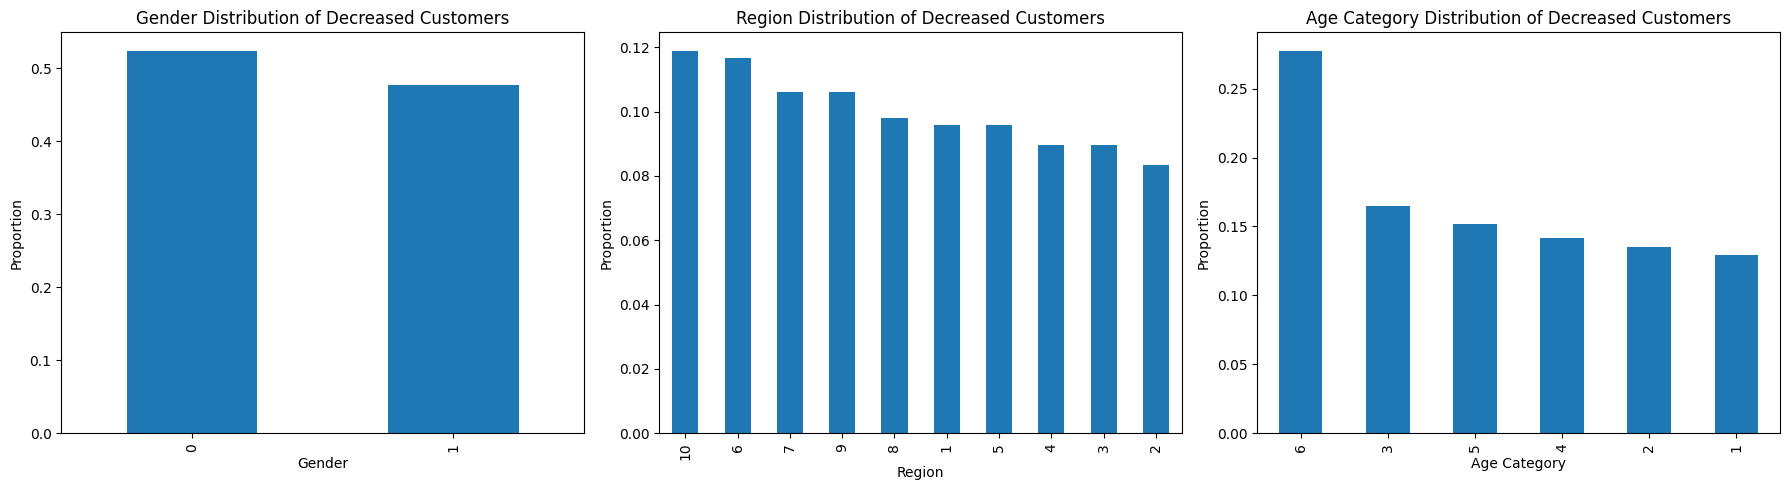

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 고객 번호를 기준으로 집계
df_cus = df.groupby('cusno').agg({
    'gender': 'first',
    'region': 'first',
    'age_cat': 'first',
    'amount': [
        lambda x: x[(data['year'] == 2020) & (data['product'] == 10)].sum(),
        lambda x: x[(data['year'] == 2020) & (data['product'] == 20)].sum(),
        lambda x: x[(data['year'] == 2020) & (data['product'] == 30)].sum(),
        lambda x: x[(data['year'] == 2021) & (data['product'] == 10)].sum(),
        lambda x: x[(data['year'] == 2021) & (data['product'] == 20)].sum(),
        lambda x: x[(data['year'] == 2021) & (data['product'] == 30)].sum(),
    ]
}).reset_index()

# 컬럼 이름 지정
df_cus.columns = ['cusno', 'gender', 'region', 'age_cat',
                  '20_amount_p10', '20_amount_p20', '20_amount_p30',
                  '21_amount_p10', '21_amount_p20', '21_amount_p30']
print(df_cus.head(),'\n')

# 총 구매 금액 계산
df_cus['total_20_amount'] = df_cus['20_amount_p10'] + df_cus['20_amount_p20'] + df_cus['20_amount_p30']
df_cus['total_21_amount'] = df_cus['21_amount_p10'] + df_cus['21_amount_p20'] + df_cus['21_amount_p30']

# 구매 감소 고객 식별
df_cus['amount_change'] = df_cus['total_21_amount'] - df_cus['total_20_amount']
df_cus['decreased'] = df_cus['amount_change'] < 0

# 구매 감소 고객 필터링
decreased_customers = df_cus[df_cus['decreased']]

# 구매 감소 고객의 성별, 지역, 연령대별 분석
gender_decreased = decreased_customers['gender'].value_counts(normalize=True)
region_decreased = decreased_customers['region'].value_counts(normalize=True)
age_cat_decreased = decreased_customers['age_cat'].value_counts(normalize=True)

# 결과 시각화
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
gender_decreased.plot(kind='bar')
plt.title('Gender Distribution of Decreased Customers')
plt.xlabel('Gender')
plt.ylabel('Proportion')

plt.subplot(1, 3, 2)
region_decreased.plot(kind='bar')
plt.title('Region Distribution of Decreased Customers')
plt.xlabel('Region')
plt.ylabel('Proportion')

plt.subplot(1, 3, 3)
age_cat_decreased.plot(kind='bar')
plt.title('Age Category Distribution of Decreased Customers')
plt.xlabel('Age Category')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()
